# 毕业论文`GRAD`
## MEIC柱状图

---
*@author: Evan*\
*@date: 2023-12-26*

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
xlspath = meicdata + 'excel/'

years = np.arange(2014,2021)
vars = ['SO2','NOx','CO','VOC','NH3','PM10','PM25','BC','OC']

In [3]:
df = {}
for var in vars:
    dfs = {}
    for year in tqdm(years,desc=f'{var}'):
        dfs[year] = pd.read_excel(xlspath + f'month_{year}.xlsx',
                                  sheet_name=var)
    df[var] = pd.concat(dfs,axis=0)
    df[var].set_index('year',inplace=True)
    df[var].drop(columns=['sector'],inplace=True)


OC: 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]


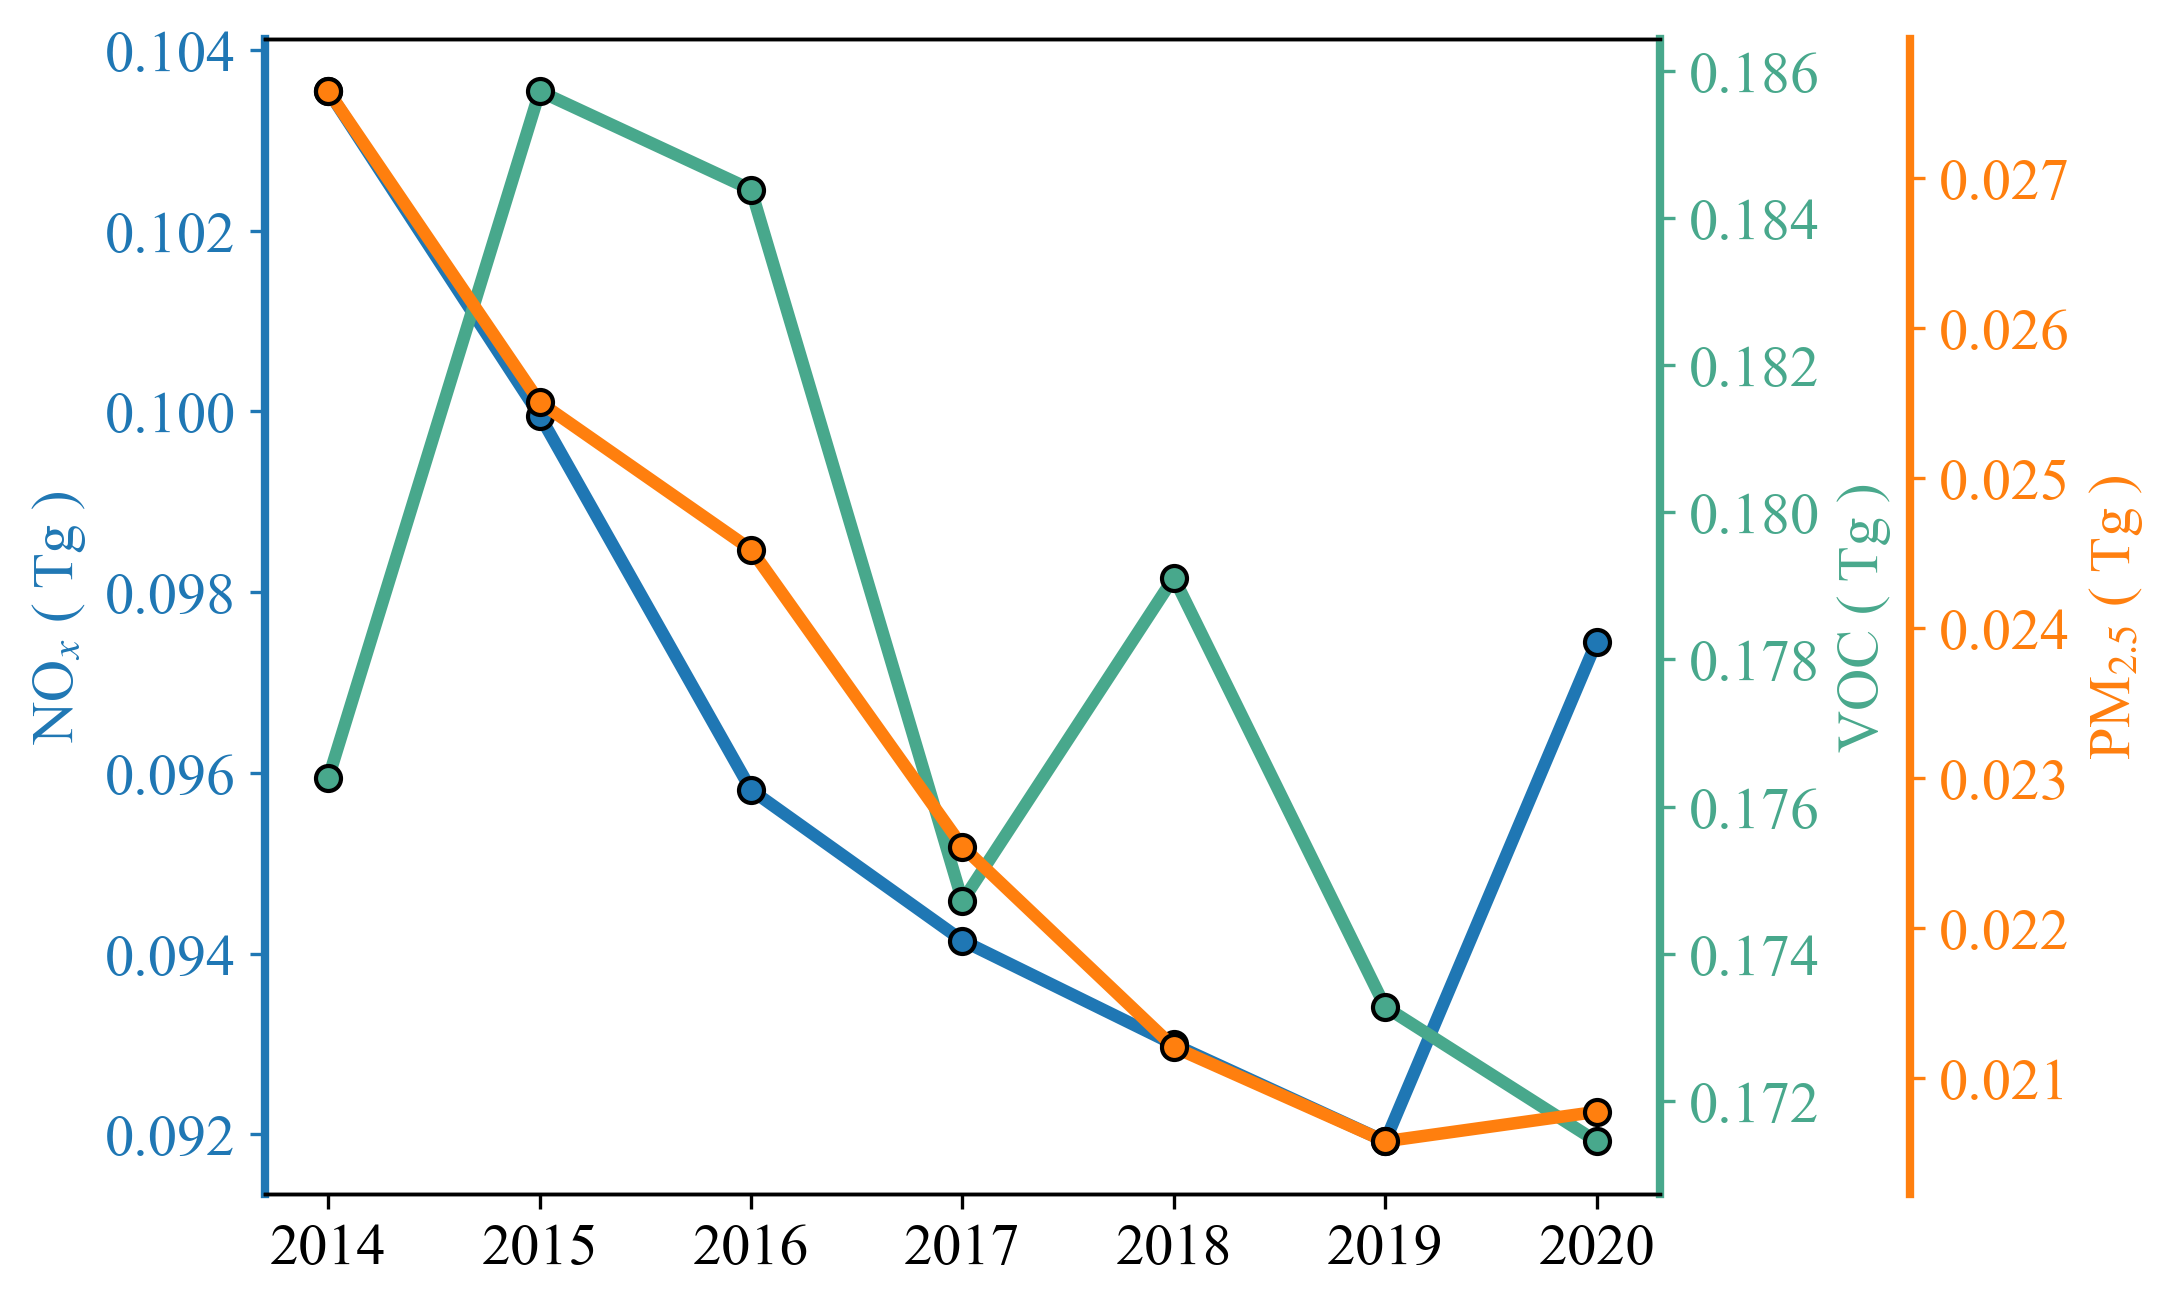

In [13]:
sel_month = 7
NOx = df['NOx'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6
VOC = df['VOC'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6
PM25 = df['PM25'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6

linedict = dict(
    linewidth=3,
    marker='o',
    markersize=6,
    markeredgecolor='k',
)

fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(), ax1.twinx()]

data = [NOx, VOC, PM25]
colors = ['tab:blue', '#48a88c', 'tab:orange']
labels = ['NO$_x$', 'VOC', 'PM$_{2.5}$']

for ax, d, color, label in zip(axes, data, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)
axes[2].spines['right'].set_position(('outward', 60))

plt.show()

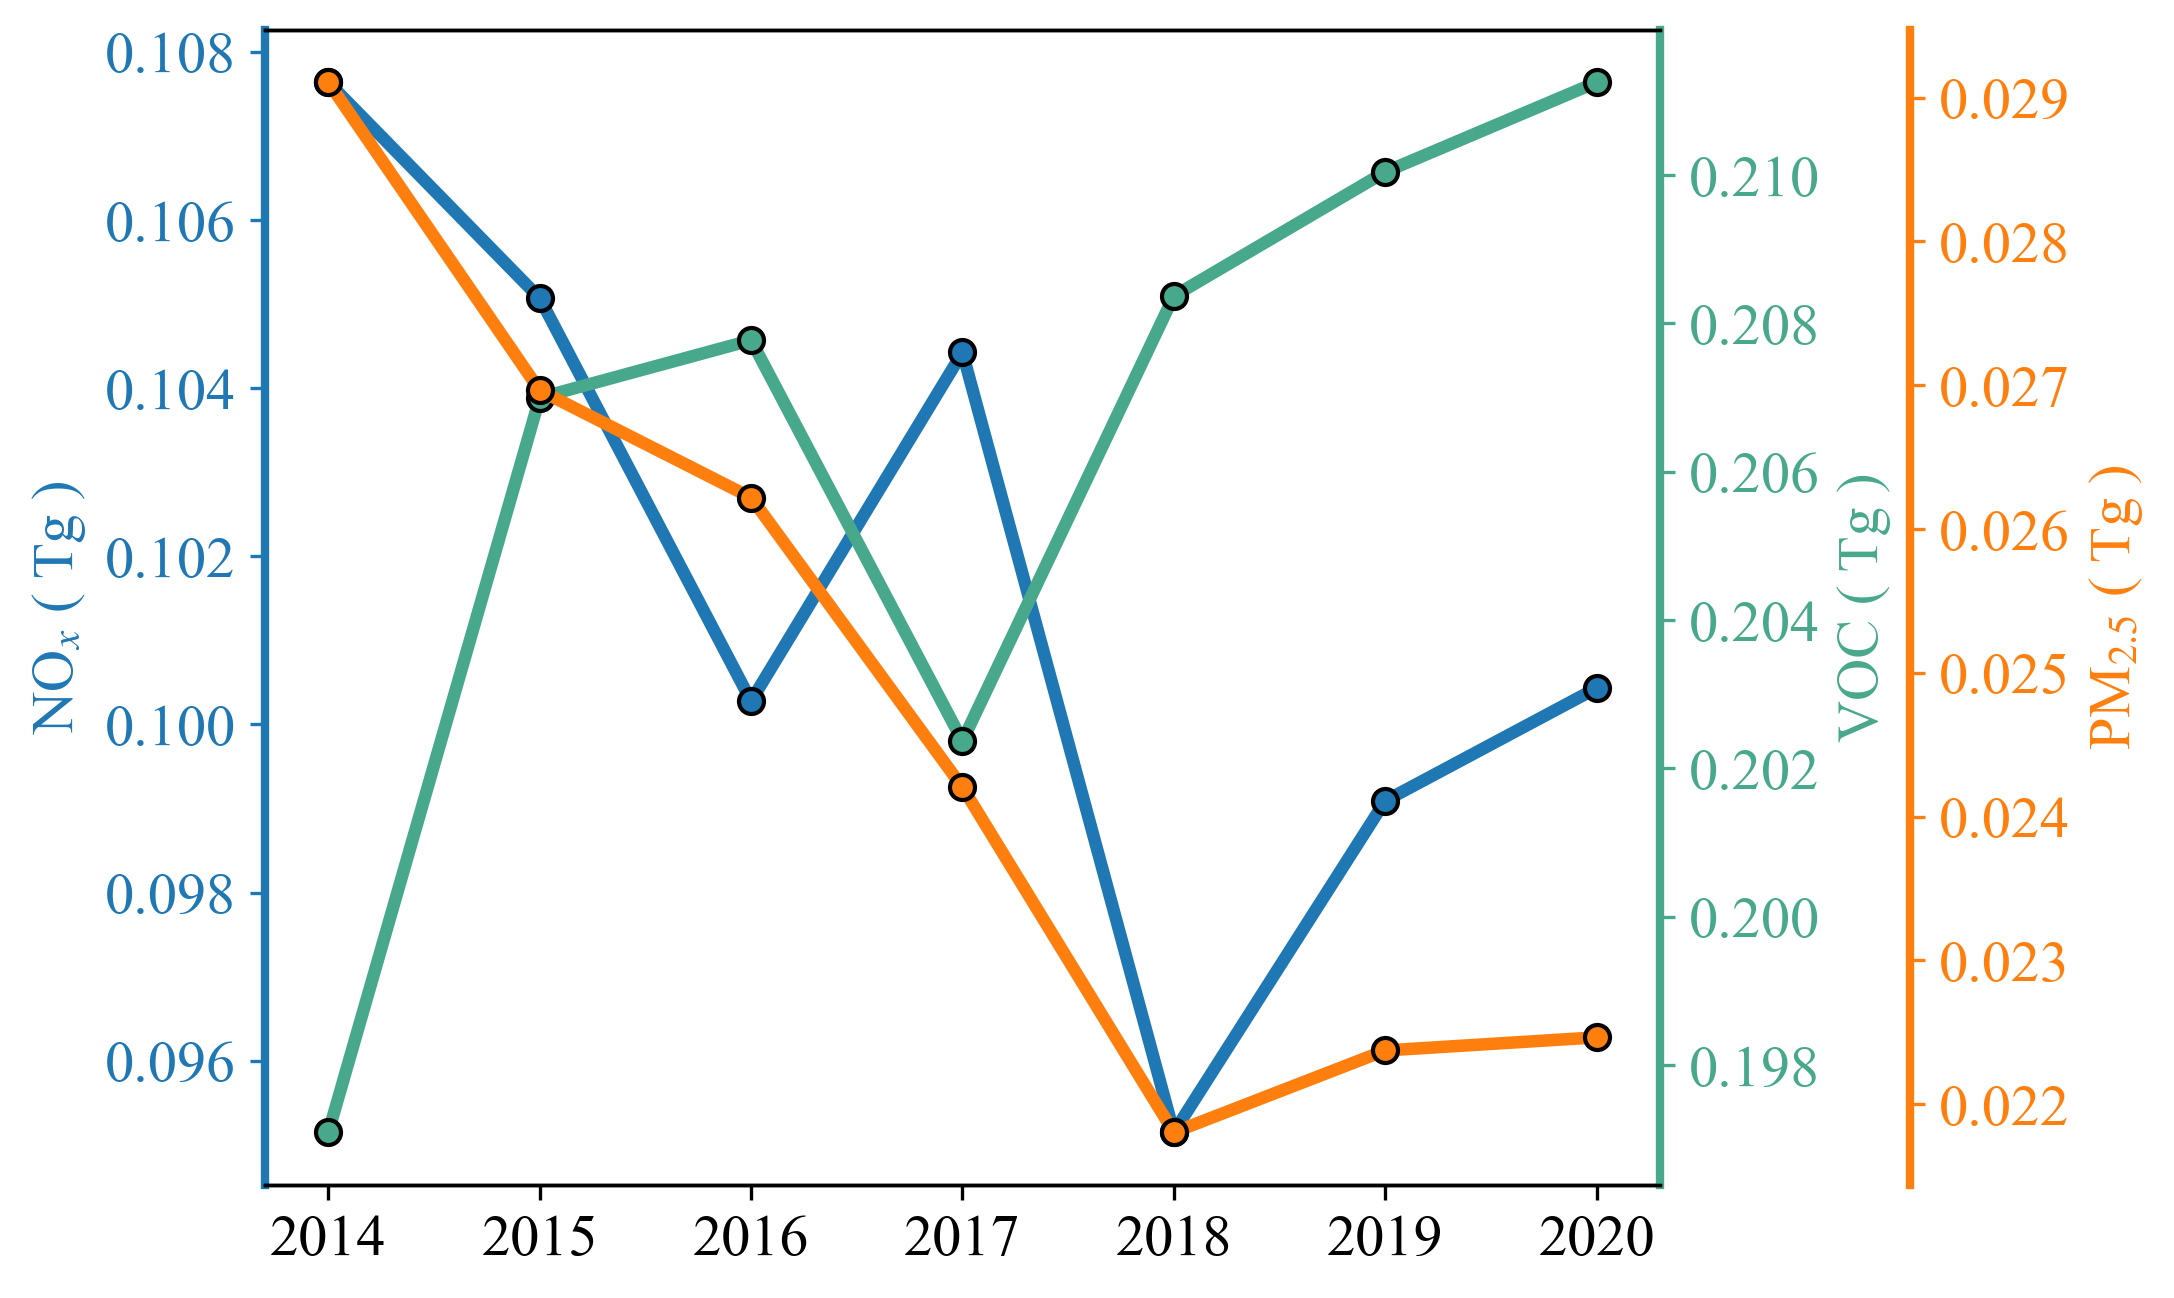

In [12]:
sel_month = 9
NOx = df['NOx'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6
VOC = df['VOC'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6
PM25 = df['PM25'].groupby('month').get_group(sel_month)['Guangdong'].values / 10**6

linedict = dict(
    linewidth=3,
    marker='o',
    markersize=6,
    markeredgecolor='k',
)

fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(), ax1.twinx()]

data = [NOx, VOC, PM25]
colors = ['tab:blue', '#48a88c', 'tab:orange']
labels = ['NO$_x$', 'VOC', 'PM$_{2.5}$']

for ax, d, color, label in zip(axes, data, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)
axes[2].spines['right'].set_position(('outward', 60))

plt.show()

## 合并7月与9月

In [14]:
NOx_7 = df['NOx'].groupby('month').get_group(7)['Guangdong'].values / 10**6
VOC_7 = df['VOC'].groupby('month').get_group(7)['Guangdong'].values / 10**6
PM25_7 = df['PM25'].groupby('month').get_group(7)['Guangdong'].values / 10**6

NOx_9 = df['NOx'].groupby('month').get_group(9)['Guangdong'].values / 10**6
VOC_9 = df['VOC'].groupby('month').get_group(9)['Guangdong'].values / 10**6
PM25_9 = df['PM25'].groupby('month').get_group(9)['Guangdong'].values / 10**6


linedict = dict(
    linewidth=3,
    marker='o',
    markersize=6,
    markeredgecolor='k',
)

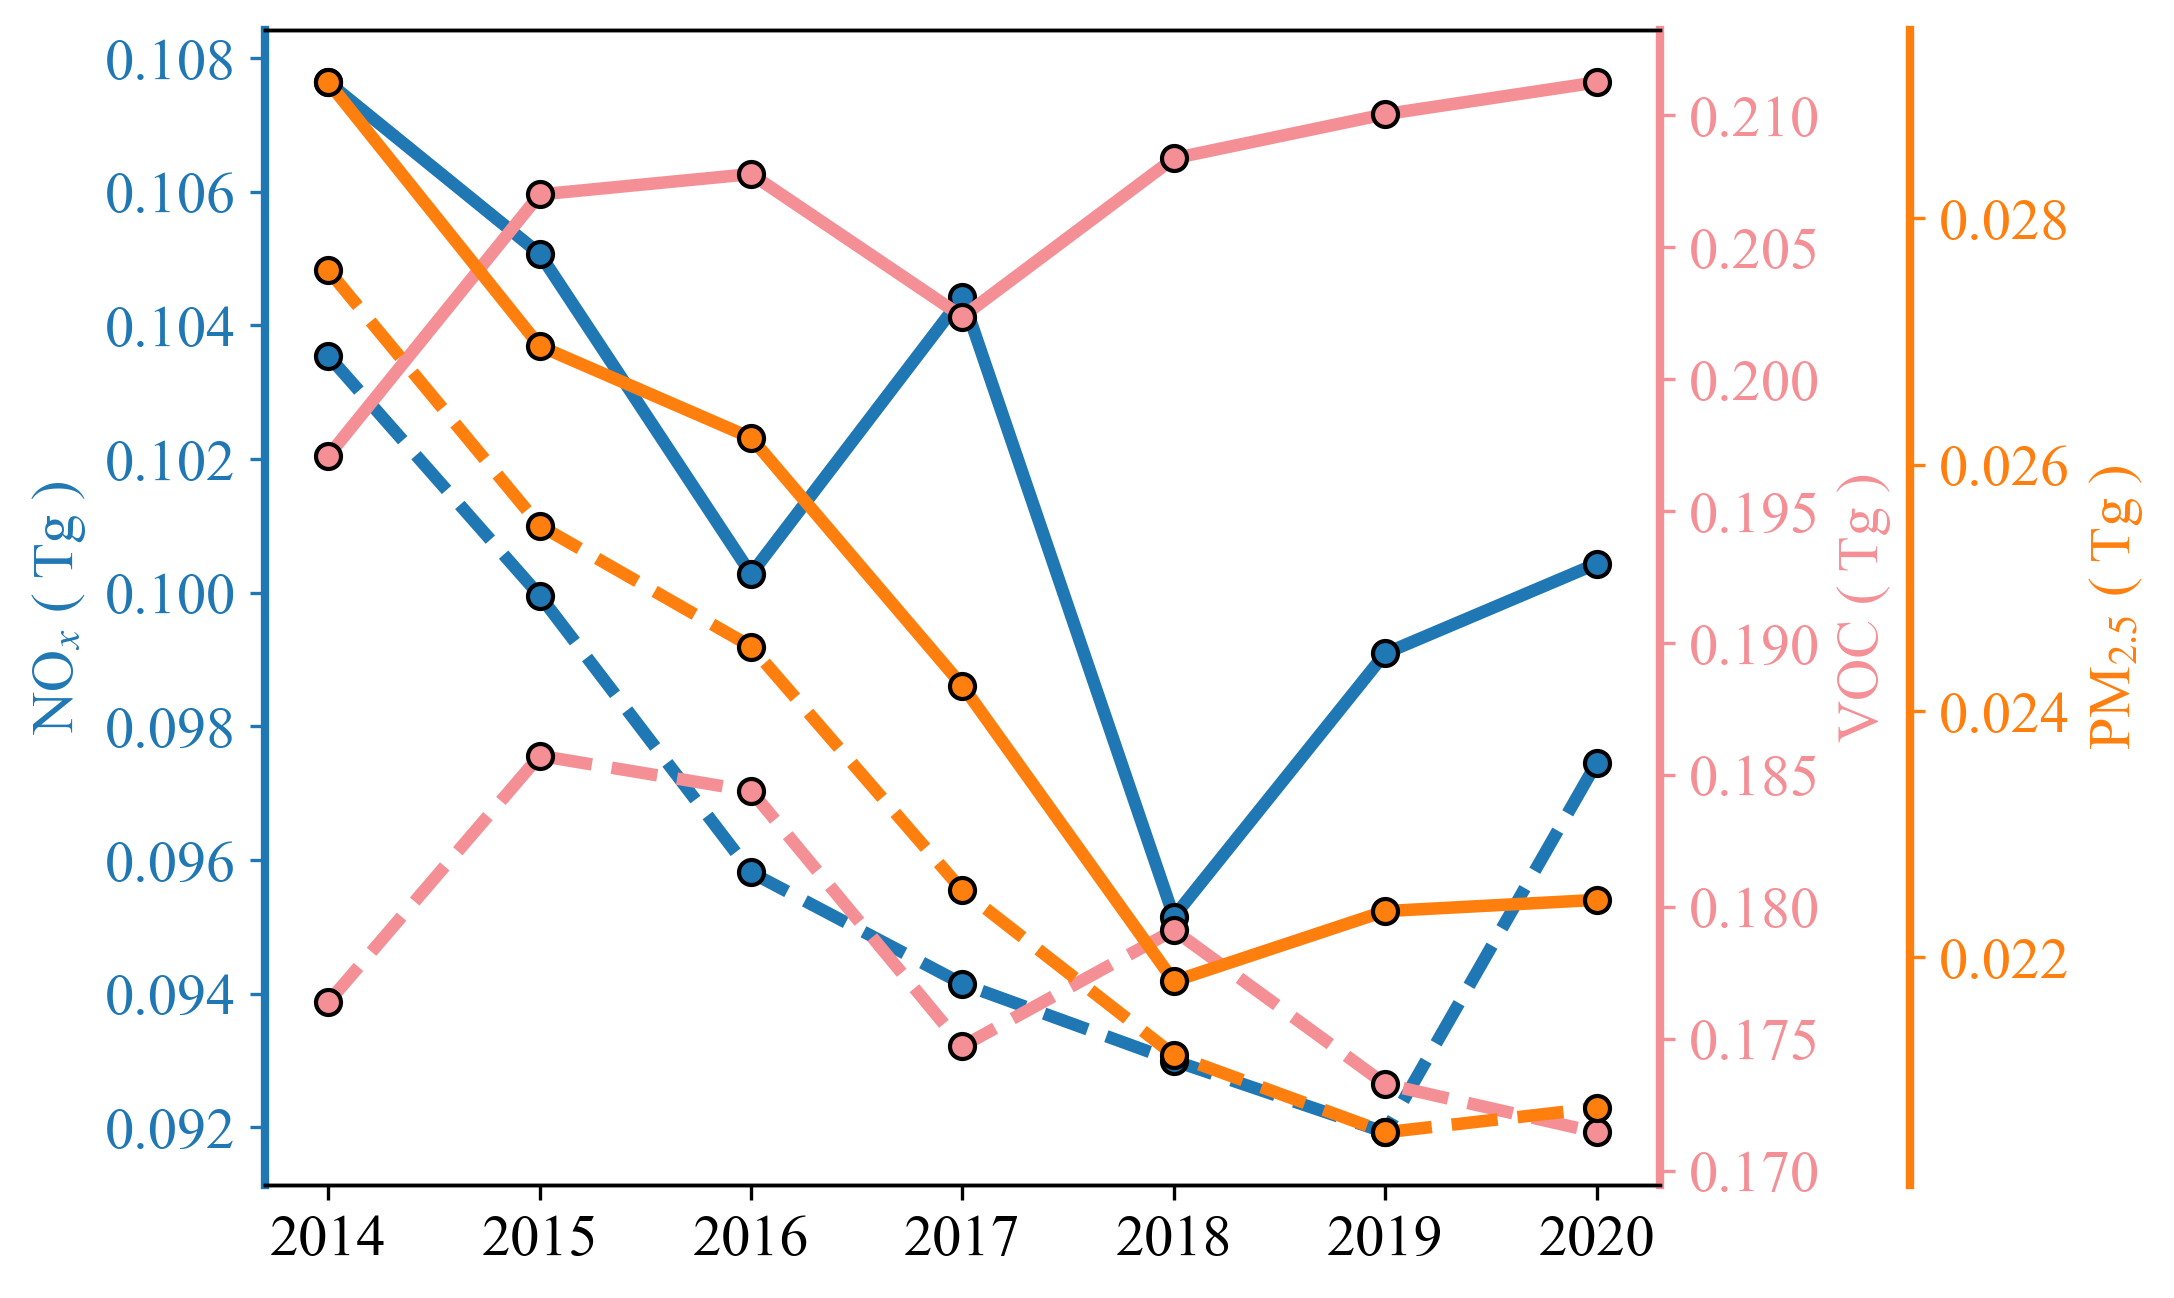

In [22]:
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(), ax1.twinx()]

data1 = [NOx_7, VOC_7, PM25_7]
data2 = [NOx_9, VOC_9, PM25_9]
colors = ['tab:blue', '#f58f96', 'tab:orange']
labels = ['NO$_x$', 'VOC', 'PM$_{2.5}$']

for ax, d, color, label in zip(axes, data1, colors, labels):
    ax.plot(years, d, label=label, color=color, linestyle='--', **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

for ax, d, color, label in zip(axes, data2, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)
axes[2].spines['right'].set_position(('outward', 60))

plt.show()

去掉PM2.5

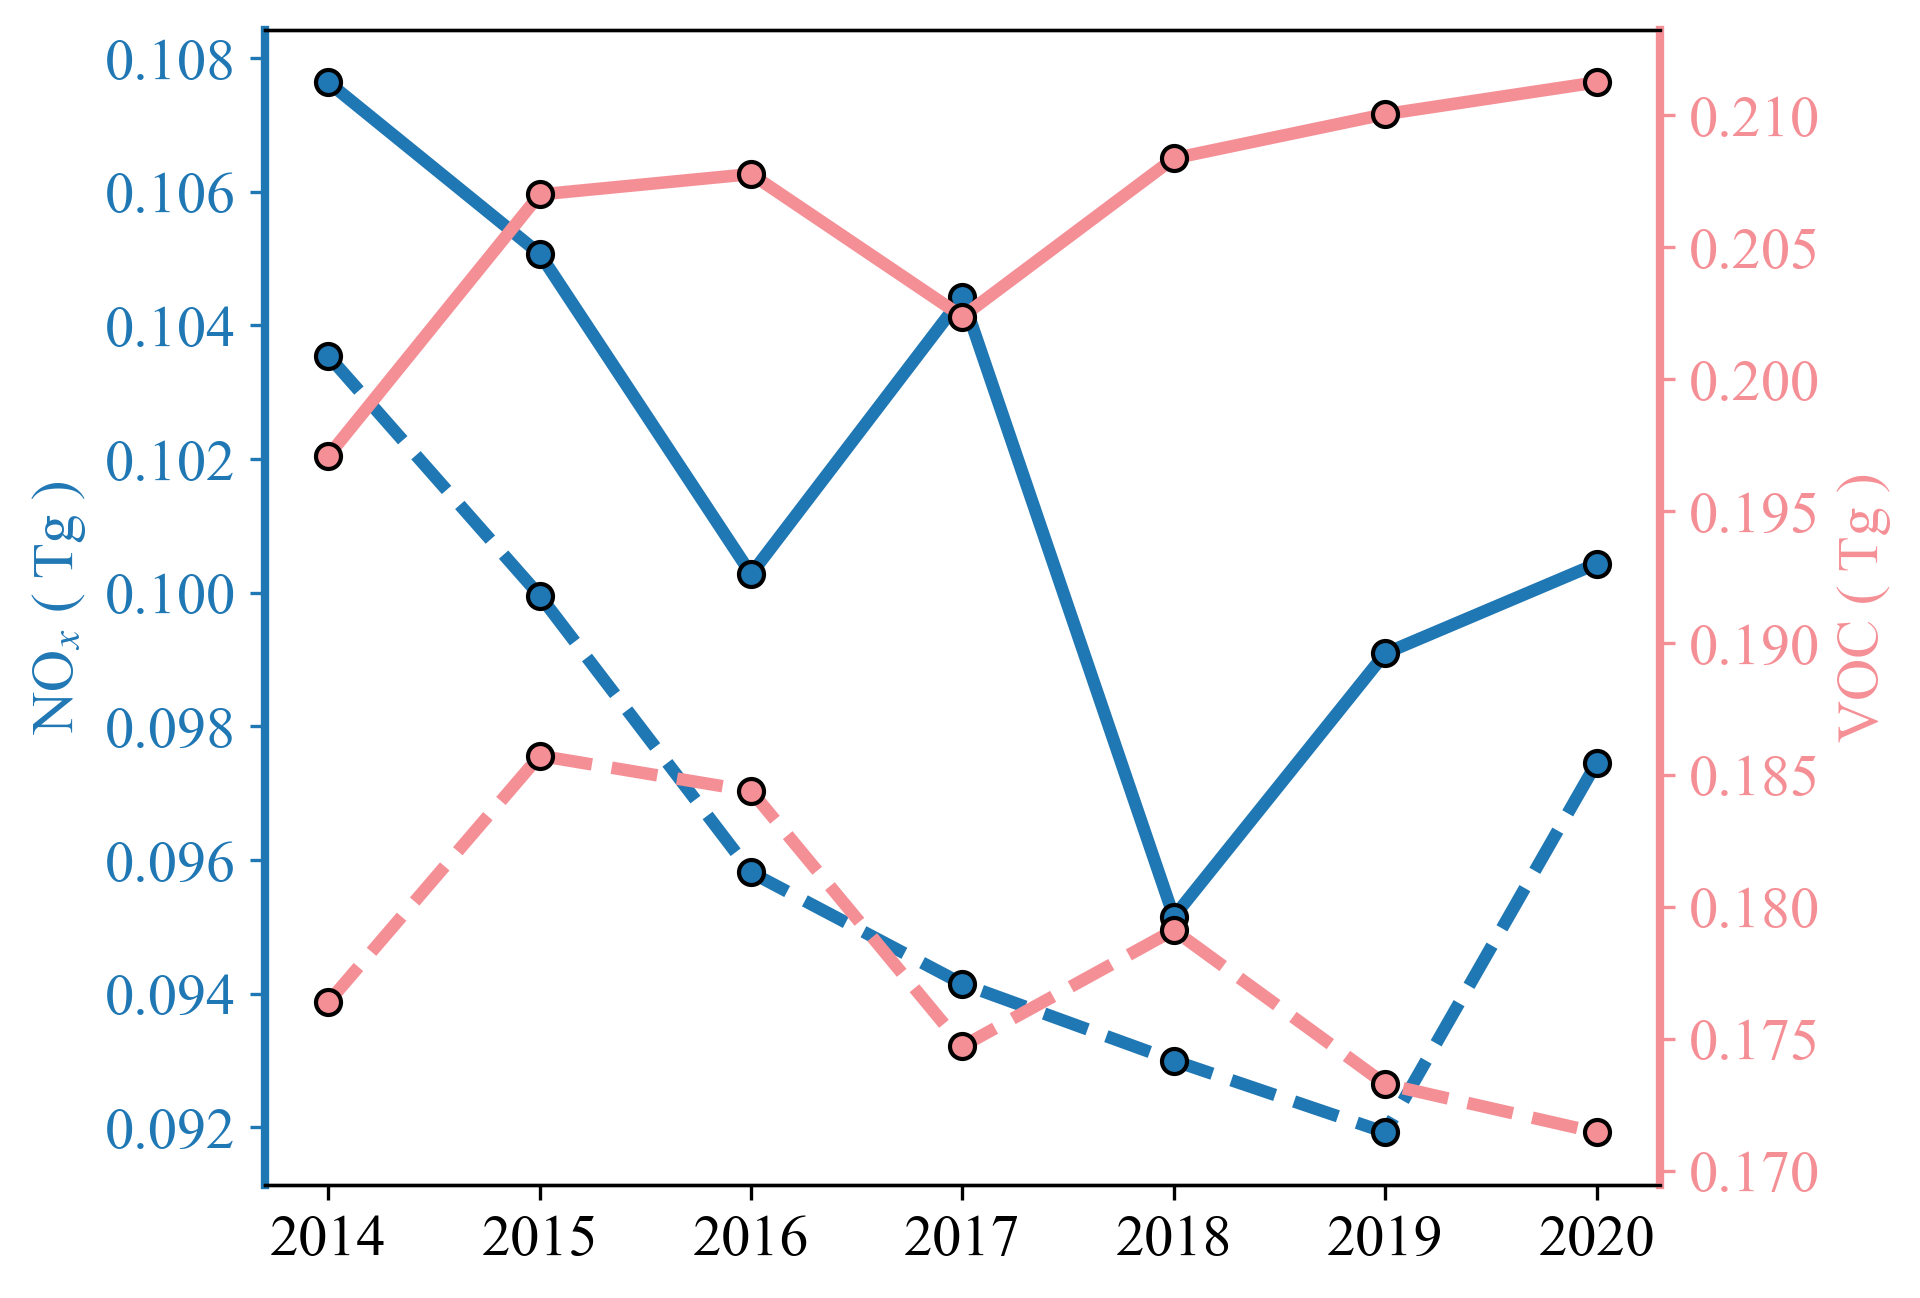

In [23]:
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(),]# ax1.twinx()]

data1 = [NOx_7, VOC_7,]# PM25_7]
data2 = [NOx_9, VOC_9,]# PM25_9]
colors = ['tab:blue', '#f58f96',]# 'tab:orange']
labels = ['NO$_x$', 'VOC',]# 'PM$_{2.5}$']

for ax, d, color, label in zip(axes, data1, colors, labels):
    ax.plot(years, d, label=label, color=color, linestyle='--', **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

for ax, d, color, label in zip(axes, data2, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)
# axes[2].spines['right'].set_position(('outward', 60))

plt.show()

加入legend

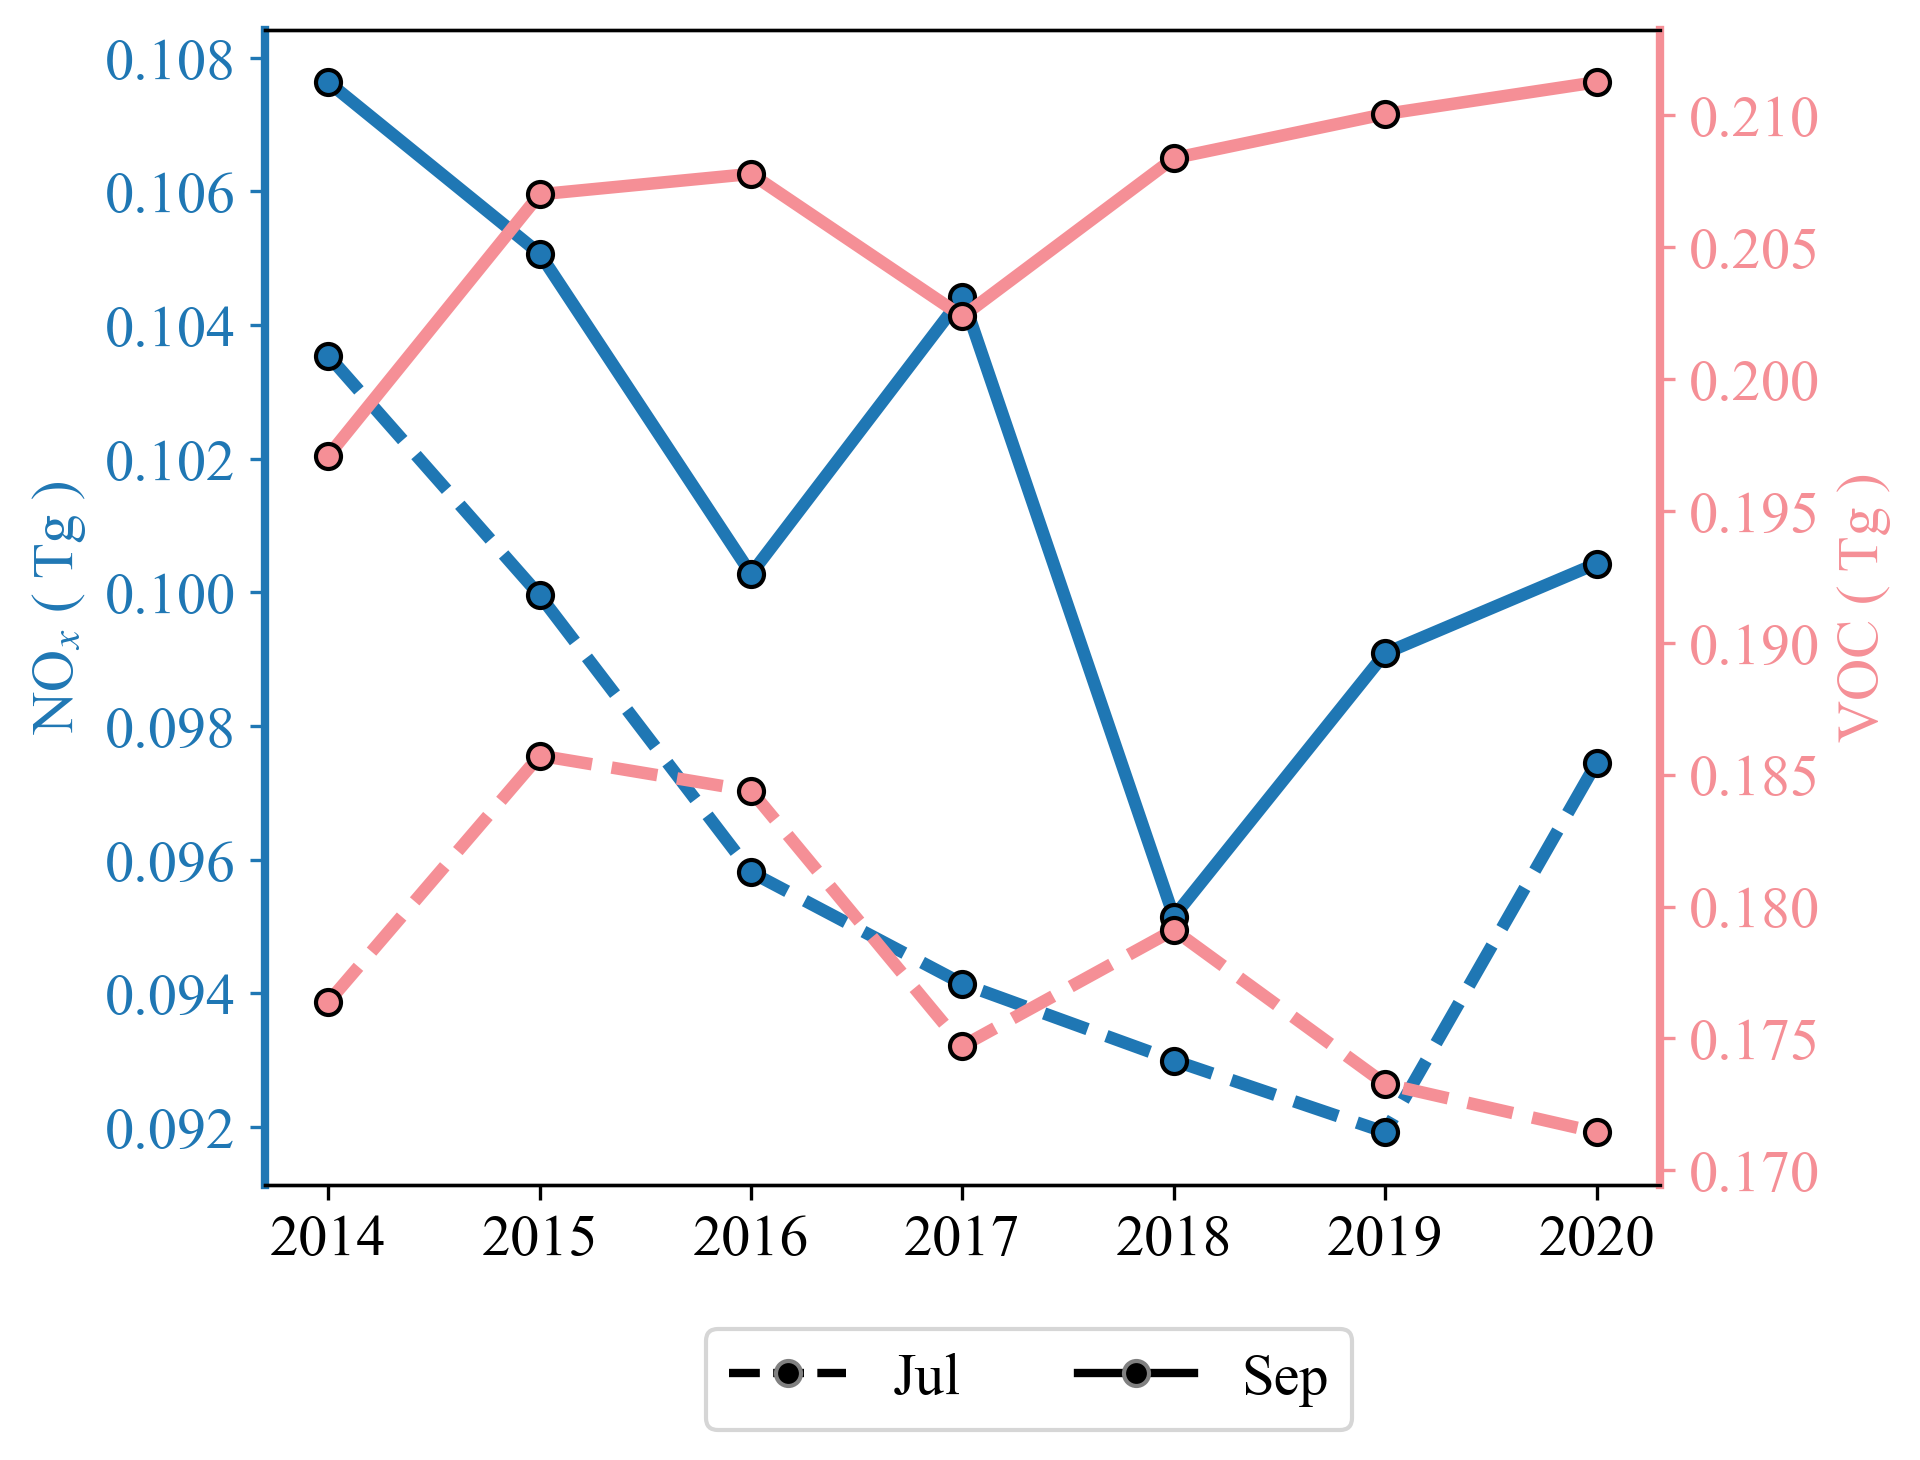

In [40]:
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(),]

data1 = [NOx_7, VOC_7,]
data2 = [NOx_9, VOC_9,]
colors = ['tab:blue', '#f58f96',]# 'tab:orange']
labels = ['NO$_x$', 'VOC',]

for ax, d, color, label in zip(axes, data1, colors, labels):
    ax.plot(years, d, label=label, color=color, linestyle='--', **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

for ax, d, color, label in zip(axes, data2, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)

legend_dict = dict(
    linewidth=2,
    marker='o',
    markersize=6,
    markeredgecolor='gray',
)
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='--',**legend_dict),
                plt.Line2D([0], [0], color='black',**legend_dict)]
legend_labels = ['Jul','Sep']
axes[0].legend(legend_lines, legend_labels,
               bbox_to_anchor=(0.8,-0.1),ncols=2, fontsize=14)

plt.show()